In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import matplotlib. pyplot as plt

In [2]:
archivo = pd.read_excel ("Dataset.xlsx", sheet_name= 'Hoja1', header = 0)

In [3]:
BPM_DF = pd.DataFrame(archivo)

Prueba de Normalidad

In [4]:
import scipy
from scipy import stats
from scipy.stats import norm

In [5]:
result = scipy.stats.anderson(BPM_DF['BPM'], dist='norm')
print('Valor P: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, Valor p > α: No se puede concluir que los datos no siguen una distribución normal (No puede rechazar H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, Valor p ≤ α: Los datos no siguen una distribución normal (Rechaza H0)' % (sl, cv))

Valor P: 0.577
15.000: 0.559, Valor p ≤ α: Los datos no siguen una distribución normal (Rechaza H0)
10.000: 0.637, Valor p > α: No se puede concluir que los datos no siguen una distribución normal (No puede rechazar H0)
5.000: 0.764, Valor p > α: No se puede concluir que los datos no siguen una distribución normal (No puede rechazar H0)
2.500: 0.891, Valor p > α: No se puede concluir que los datos no siguen una distribución normal (No puede rechazar H0)
1.000: 1.060, Valor p > α: No se puede concluir que los datos no siguen una distribución normal (No puede rechazar H0)


In [6]:
print('Promedio:',BPM_DF['BPM'].mean())

Promedio: 129.15458577437957


In [7]:
print('Desviación Estándar:',BPM_DF['BPM'].std())

Desviación Estándar: 19.72707993812042


Histograma de los Datos

In [8]:
import seaborn as sns

[Text(0.5, 0, 'BPM'),
 Text(0, 0.5, 'Cantidad de Repeticiones'),
 Text(0.5, 1.0, 'Histograma de los Datos')]

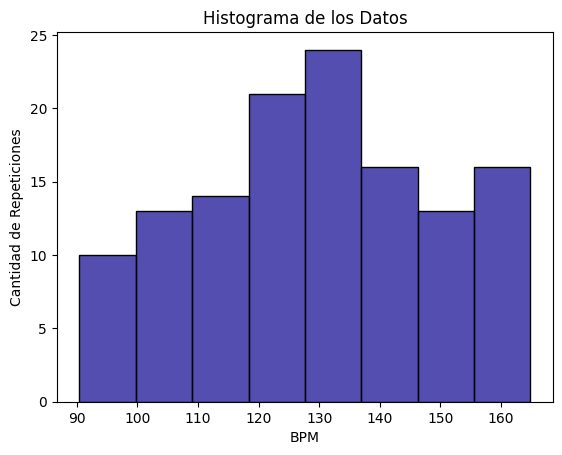

In [9]:
histograma = sns.histplot(data = BPM_DF, x=BPM_DF['BPM'],  color = "#1C1297")
histograma.set(xlabel='BPM', ylabel='Cantidad de Repeticiones', title='Histograma de los Datos')

Box Plot de los Datos

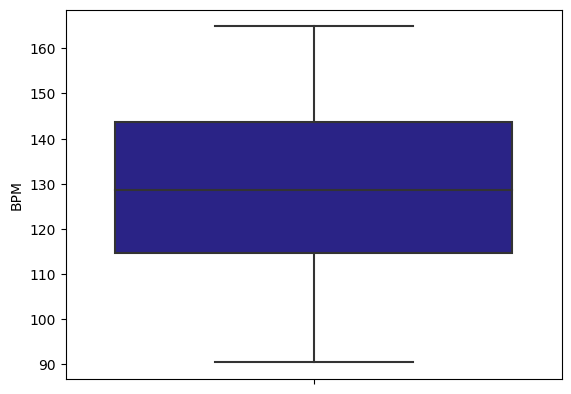

In [10]:
boxplot = sns.boxplot(data = BPM_DF, y=BPM_DF['BPM'],  color = "#1C1297")

Test de Grubbs

In [12]:
from OUTLIERS import smirnov_grubbs as grubbs

In [13]:
BPM_Grubss = grubbs.max_test_outliers(BPM_DF['BPM'], alpha=.05)
print(BPM_Grubss)

[]
